# Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [3]:
import pandas as pd
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [4]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values=["NaN", "Unknown", "UNKNOWN", "unknown", "no name", "NO NAME", "Dog Name Not Provided"]) 
df.columns = df.columns.str.replace(' ','_')
df.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [5]:
df.shape

(30000, 15)

In [6]:
df.dtypes

Owner_Zip_Code                     int64
Animal_Name                       object
Animal_Gender                     object
Primary_Breed                     object
Secondary_Breed                   object
Animal_Dominant_Color             object
Animal_Secondary_Color            object
Animal_Third_Color                object
Animal_Birth              datetime64[ns]
Spayed_or_Neut                    object
Guard_or_Trained                  object
Vaccinated                        object
Application_Date          datetime64[ns]
License_Issued_Date       datetime64[ns]
License_Expired_Date      datetime64[ns]
dtype: object

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

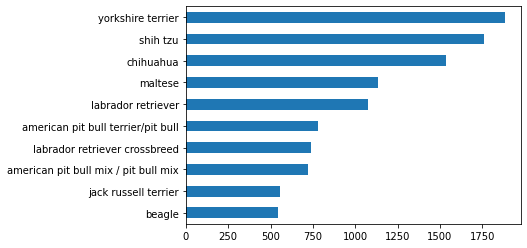

In [7]:
# There were 12894 dogs whose breed was unknown
# Unknown values are now excluded by default after having equaled them to na_values
df.Primary_Breed.str.lower().value_counts().sort_values().tail(10).plot(kind='barh')

## What are the most popular dog names?

In [8]:
df.Animal_Name.str.lower().value_counts().head(10)

max        256
bella      236
charlie    207
rocky      171
lola       169
coco       166
lucy       154
buddy      139
lucky      124
daisy      114
Name: Animal_Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [9]:
# Not a single dog has my name
df["Animal_Name"] = df["Animal_Name"].str.lower()
df[df.Animal_Name == 'patricia']

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date


In [10]:
# 256 dogs are called Max
dogs_max = df[df.Animal_Name == 'max']
dogs_max.shape

(256, 15)

In [11]:
# 13 dogs are called Maxwell
dogs_maxwell = df[df.Animal_Name == 'maxwell']
dogs_maxwell.shape

(13, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [13]:
df['Guard_or_Trained'].value_counts(normalize=True, dropna=False) * 100
# you need to take into account NAN values.

No     66.030000
NaN    33.913333
Yes     0.056667
Name: Guard_or_Trained, dtype: float64

## What are the actual numbers?

In [14]:
df.Guard_or_Trained.str.lower().value_counts()

no     19809
yes       17
Name: Guard_or_Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [15]:
# OR df['Guard or Trained'] = df['Guard or Trained'].fillna("No")
df.Guard_or_Trained = df.Guard_or_Trained.replace({
    np.nan: 'No',
    'no': 'No',
    'yes': 'Yes'
})
df.Guard_or_Trained.value_counts()

No     29983
Yes       17
Name: Guard_or_Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [16]:
df.Primary_Breed[df.Guard_or_Trained == 'Yes'].value_counts().head(10)

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary_Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [17]:
df['Year'] = df['Animal_Birth'].apply(lambda birth: birth.year)
df.head()
# OR df['birth_year'] = df['Animal_Birth'].dt.year
# so you convert the datetime into a YEAR

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [18]:
df['Age'] = 2021 - df['Year']
df.Age.describe()
#On average these dogs are over 11 years old

count    30000.000000
mean        11.712433
std          4.066803
min          6.000000
25%          8.000000
50%         11.000000
75%         15.000000
max         37.000000
Name: Age, dtype: float64

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [19]:
zipcodes_df = pd.read_csv("zipcodes-neighborhoods.csv")
zipcodes_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [20]:
# how='inner' is the default - only keeps matches
# how='left' will keep dogs without neighborhoods
# how='right' would have kept neighborhoods without dogs
# how='outer' would have kept everyone on both sides without a match
merged = df.merge(zipcodes_df, how='left', left_on='Owner_Zip_Code', right_on='zip')
merged.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year,Age,neighborhood,zip,borough
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024.0,Manhattan
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,8,Southeast Bronx,10461.0,Bronx
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,7,Greenwich Village and Soho,10013.0,Manhattan
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,13,Upper West Side,10025.0,Manhattan
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,7,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [21]:
merged.Animal_Name[merged.borough == "Queens"].value_counts().head(5)

max        61
bella      60
rocky      50
coco       49
charlie    46
Name: Animal_Name, dtype: int64

In [22]:
merged.Animal_Name[merged.borough == "Brooklyn"].value_counts().head(5)

max         64
charlie     56
bella       55
rocky       44
princess    38
Name: Animal_Name, dtype: int64

In [23]:
merged.Animal_Name[merged.neighborhood == "Upper East Side"].value_counts().head(5)

charlie    20
bella      14
lucy       12
molly      12
oliver     11
Name: Animal_Name, dtype: int64

### What is the most common dog breed in each of the neighborhoods of NYC?

In [24]:
merged.groupby('neighborhood').Primary_Breed.value_counts().groupby(level=0, group_keys=False).nlargest(1).to_frame()

,,Primary_Breed
neighborhood,Primary_Breed,
Borough Park,Yorkshire Terrier,49
Bronx Park and Fordham,Yorkshire Terrier,39
Bushwick and Williamsburg,Yorkshire Terrier,47
Canarsie and Flatlands,Shih Tzu,56
Central Bronx,Yorkshire Terrier,29
Central Brooklyn,Shih Tzu,52
Central Harlem,Chihuahua,48
Central Queens,Yorkshire Terrier,34
Chelsea and Clinton,Chihuahua,80


## What breed of dogs are the least likely to be spayed? Male or female?

In [25]:
merged.groupby('Primary_Breed').Spayed_or_Neut.value_counts(normalize=True).sort_values(ascending=False)

Primary_Breed                       Spayed_or_Neut
Leonberger                          Yes               1.000000
Lancashire Heeler                   Yes               1.000000
Goldendoodle                        Yes               1.000000
Schipperke                          Yes               1.000000
Nova Scotia Duck Tolling Retriever  Yes               1.000000
                                                        ...   
Labrador Retriever Crossbreed       No                0.042005
Welsh Corgi, Cardigan               No                0.040000
German Shepherd Crossbreed          No                0.033241
Greyhound                           No                0.017857
Bassett Hound                       No                0.016949
Name: Spayed_or_Neut, Length: 428, dtype: float64

In [26]:
merged.groupby('Animal_Gender')['Spayed_or_Neut'].value_counts(normalize=True)
# Females are 85% neutered, males are 79% neutered

Animal_Gender  Spayed_or_Neut
               Yes               1.000000
F              Yes               0.857850
               No                0.142150
M              Yes               0.791856
               No                0.208144
Name: Spayed_or_Neut, dtype: float64

In [27]:
# Could also use crosstab
pd.crosstab(merged['Animal_Gender'], merged['Spayed_or_Neut'], normalize='index')

Spayed_or_Neut,No,Yes
Animal_Gender,,
,0.000000,1.000000
F,0.142150,0.857850
M,0.208144,0.791856


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [28]:
df['monochrome'] = (
    df['Animal_Dominant_Color'].str.lower().isin(['black', 'white', 'grey', np.nan])
) & (
    df['Animal_Dominant_Color'].str.lower().isin(['black', 'white', 'grey', np.nan])
) & (
    df['Animal_Dominant_Color'].str.lower().isin(['black', 'white', 'grey', np.nan])
)

In [29]:
df.monochrome.value_counts()

True     15019
False    14981
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [30]:
merged.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

<AxesSubplot:>

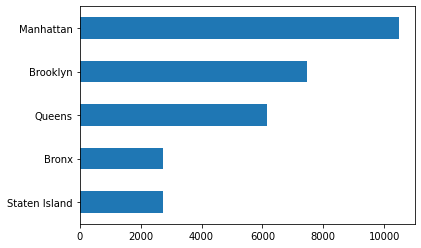

In [31]:
merged.borough.value_counts().sort_values().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [42]:
counts = merged['borough'].value_counts().reset_index()
counts

,index,borough
0,Manhattan,10478
1,Brooklyn,7466
2,Queens,6154
3,Bronx,2748
4,Staten Island,2727


In [43]:
pop = pd.read_csv("boro_population.csv")
pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [44]:
counts_with_pop = counts.merge(pop, left_on='index', right_on='borough')
counts_with_pop

,index,borough_x,borough_y,population,area_sqmi
0,Manhattan,10478,Manhattan,1644518,23
1,Brooklyn,7466,Brooklyn,2636735,71
2,Queens,6154,Queens,2339150,109
3,Bronx,2748,Bronx,1455444,42
4,Staten Island,2727,Staten Island,474558,59


In [45]:
# Per 1k people
counts_with_pop['per_capita'] = counts_with_pop.borough_x / counts_with_pop.population * 1000
counts_with_pop

,index,borough_x,borough_y,population,area_sqmi,per_capita
0,Manhattan,10478,Manhattan,1644518,23,6.371472
1,Brooklyn,7466,Brooklyn,2636735,71,2.831532
2,Queens,6154,Queens,2339150,109,2.630870
3,Bronx,2748,Bronx,1455444,42,1.888084
4,Staten Island,2727,Staten Island,474558,59,5.746400


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [47]:
popular_dogs = merged_popu.groupby('borough').Primary_Breed.value_counts().groupby(level=0, group_keys=False).nlargest(5)
popular_dogs

borough        Primary_Breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               

<AxesSubplot:ylabel='borough,Primary_Breed'>

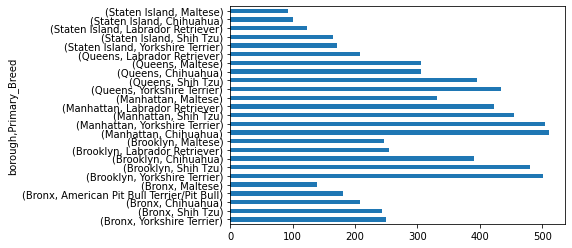

In [51]:
popular_dogs.plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [52]:
merged_popu.Guard_or_Trained.value_counts(normalize=True, dropna=False) * 100

No     99.945897
Yes     0.054103
Name: Guard_or_Trained, dtype: float64